In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA

In [3]:
stock=pd.read_csv("C:\\Users\\Siva\\Desktop\\ExcelR\\Project\\AAPL.csv")
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [4]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

In [5]:
import sklearn.metrics  
def RMSE(pred,org):
    value=np.sqrt(sklearn.metrics.mean_squared_error(org, pred)  )
    return value


In [6]:
train=stock.iloc[:1501,:]
test=stock.iloc[1501:,:]
test

,Date,Open,High,Low,Close,Adj Close,Volume
1501,2017-12-19,175.029999,175.389999,174.089996,174.539993,168.252151,27436400
1502,2017-12-20,174.869995,175.419998,173.250000,174.350006,168.069016,23475600
1503,2017-12-21,174.169998,176.020004,174.100006,175.009995,168.705246,20949900
1504,2017-12-22,174.679993,175.419998,174.500000,175.009995,168.705246,16349400
1505,2017-12-26,170.800003,171.470001,169.679993,170.570007,164.425217,33185500
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [12]:
arima_model111=ARIMA(train.Close, order=(1,1,1)).fit()
train_pred111 = arima_model111.predict(start = train.index[0],end = train.index[-1])
test_pred111 = arima_model111.predict(start = test.index[0],end = test.index[-1])

print("Test MAPE :",MAPE(test_pred111,test.Close))
print('Test RMSE:' ,RMSE(test_pred111,test.Close))

Test MAPE : 12.247791547103287
Test RMSE: 36.68446194804079


In [13]:
arima_model021=ARIMA(train.Close, order=(0,2,1)).fit()
train_pred021 = arima_model021.predict(start = train.index[0],end = train.index[-1])
test_pred021 = arima_model021.predict(start = test.index[0],end = test.index[-1])

print("Test MAPE :",MAPE(test_pred021,test.Close))
print('Test RMSE:' ,RMSE(test_pred021,test.Close))

Test MAPE : 9.346487131346679
Test RMSE: 23.66402545146234


In [15]:
arima_model121=ARIMA(train.Close, order=(1,2,1)).fit()
train_pred121= arima_model121.predict(start = train.index[0],end = train.index[-1])
test_pred121= arima_model121.predict(start = test.index[0],end = test.index[-1])

print("Test MAPE :",MAPE(test_pred121,test.Close))
print('Test RMSE:' ,RMSE(test_pred121,test.Close))

Test MAPE : 8.986143730609191
Test RMSE: 23.914613317265232


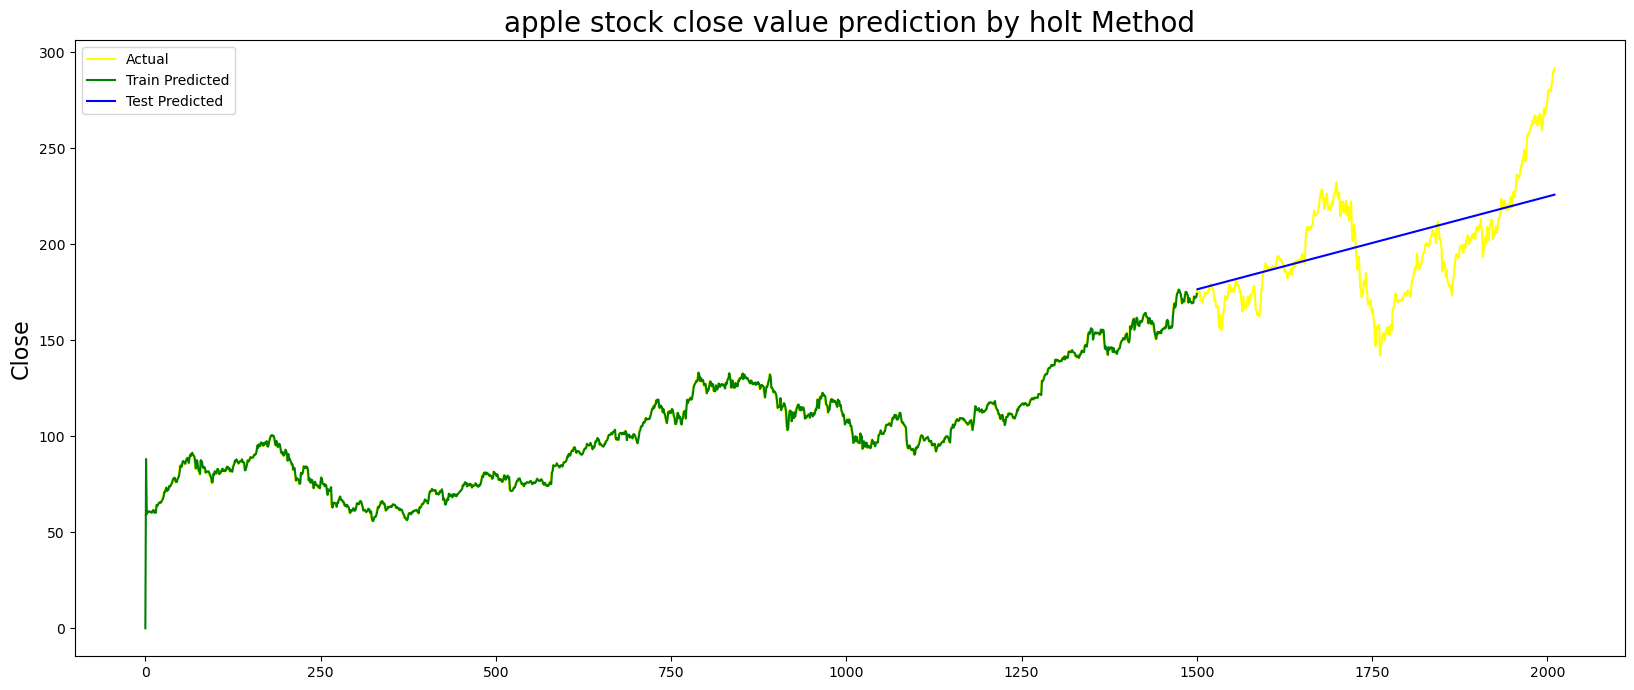

In [17]:

plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='yellow',label="Actual")
plt.plot(train_pred021, color='green',label="Train Predicted")
plt.plot(test_pred021, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by arima', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

# Arima model doesn't good model as the data having seasonality even after differencing